In [58]:
import pint
import numpy as np
import pandas as pd
from sympy import symbols, Eq, solve

ureg = pint.get_application_registry()
Q_ = ureg.Quantity

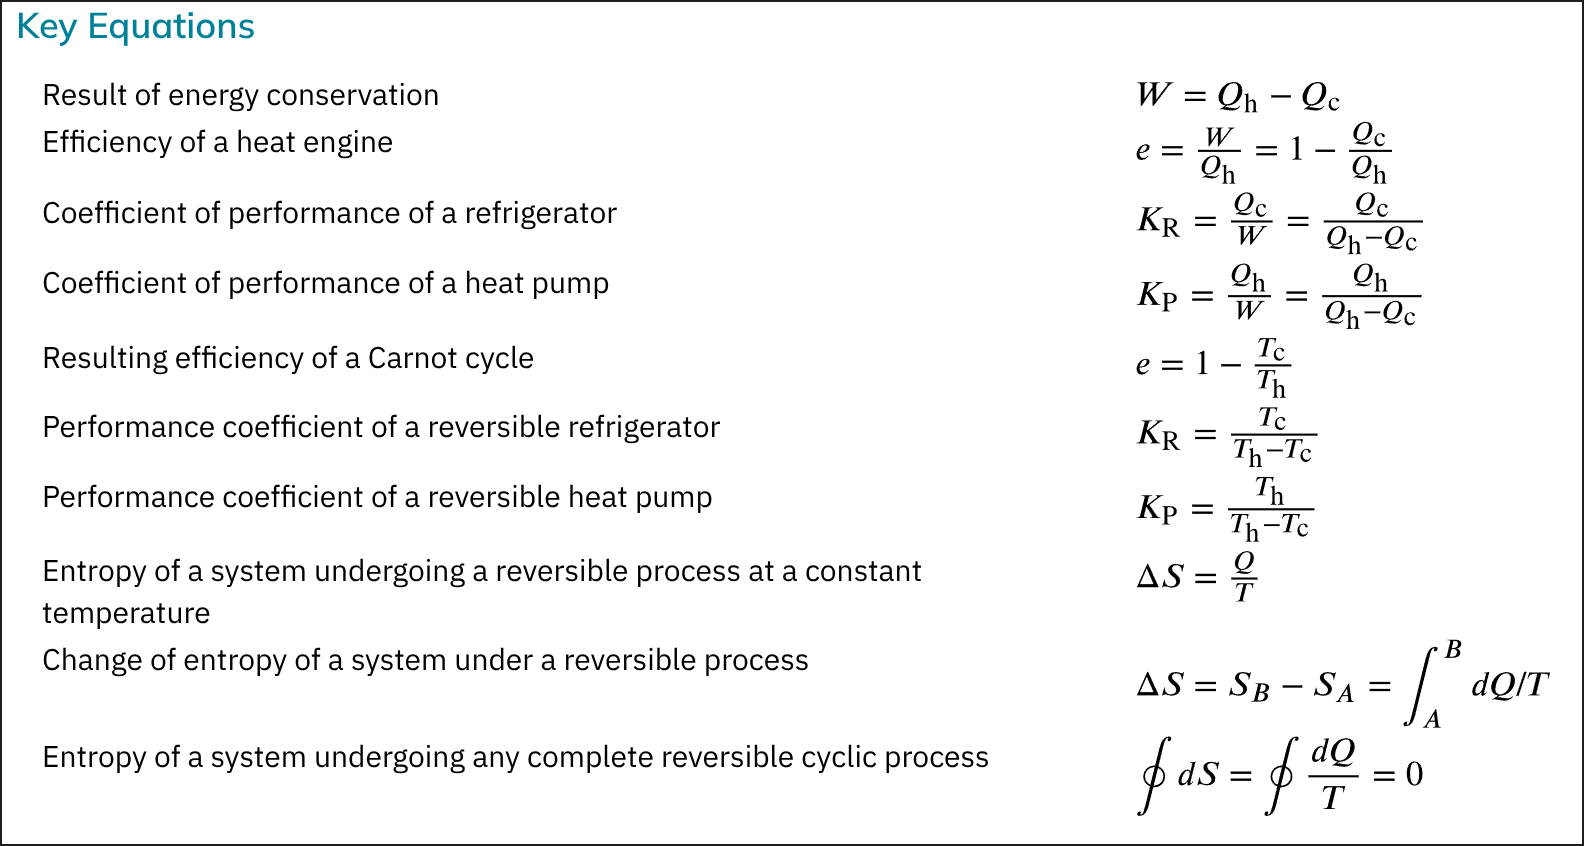

# Problem 1: Heat Pump, Carnot Machine

An ideal Carnot machine pumps heat from Tc = 263 K to Th = 308 K.

1) What is the COP of the heat pump?

2) How much work (i.e. electrical input power) would be needed for such an ideal
(Carnot) heat pump to deliver 10 kW of heat to the hot reservoir?

3) When delivering 10 kW of heat, how much heat would be extracted from the cold
reservoir?


we use the formula:
$$
COP = K_p = \frac{T_h}{T_h - T_c}
$$

In [59]:
T_c = Q_(263, 'kelvin')
T_h = Q_(308, 'kelvin')
K_p = T_h / (T_h - T_c)
print(f"Coefficient of performance (COP): {K_p:.2f}")

Coefficient of performance (COP): 6.84 dimensionless


we use the formula:
$$
K_p = \frac{Q_h}{W}
$$

In [60]:
Q_h = Q_(10, "kW")
W = Q_h / K_p
print(f"Work input required: {W:.2f}")


Work input required: 1.46 kilowatt


we use the formula:
$$
W = Q_h - Q_c
$$

In [61]:
Q_c = Q_h - W
print(f"Heat extracted from the cold reservoir: {Q_c:.2f}")

Heat extracted from the cold reservoir: 8.54 kilowatt


# Problem 2: R410a-based machine
A R410a-based heat pump pumps heat from Tc = 253 K
to Th = 313 K.
Assume that the machine operates with 1 kg of R410a as
the operating medium.

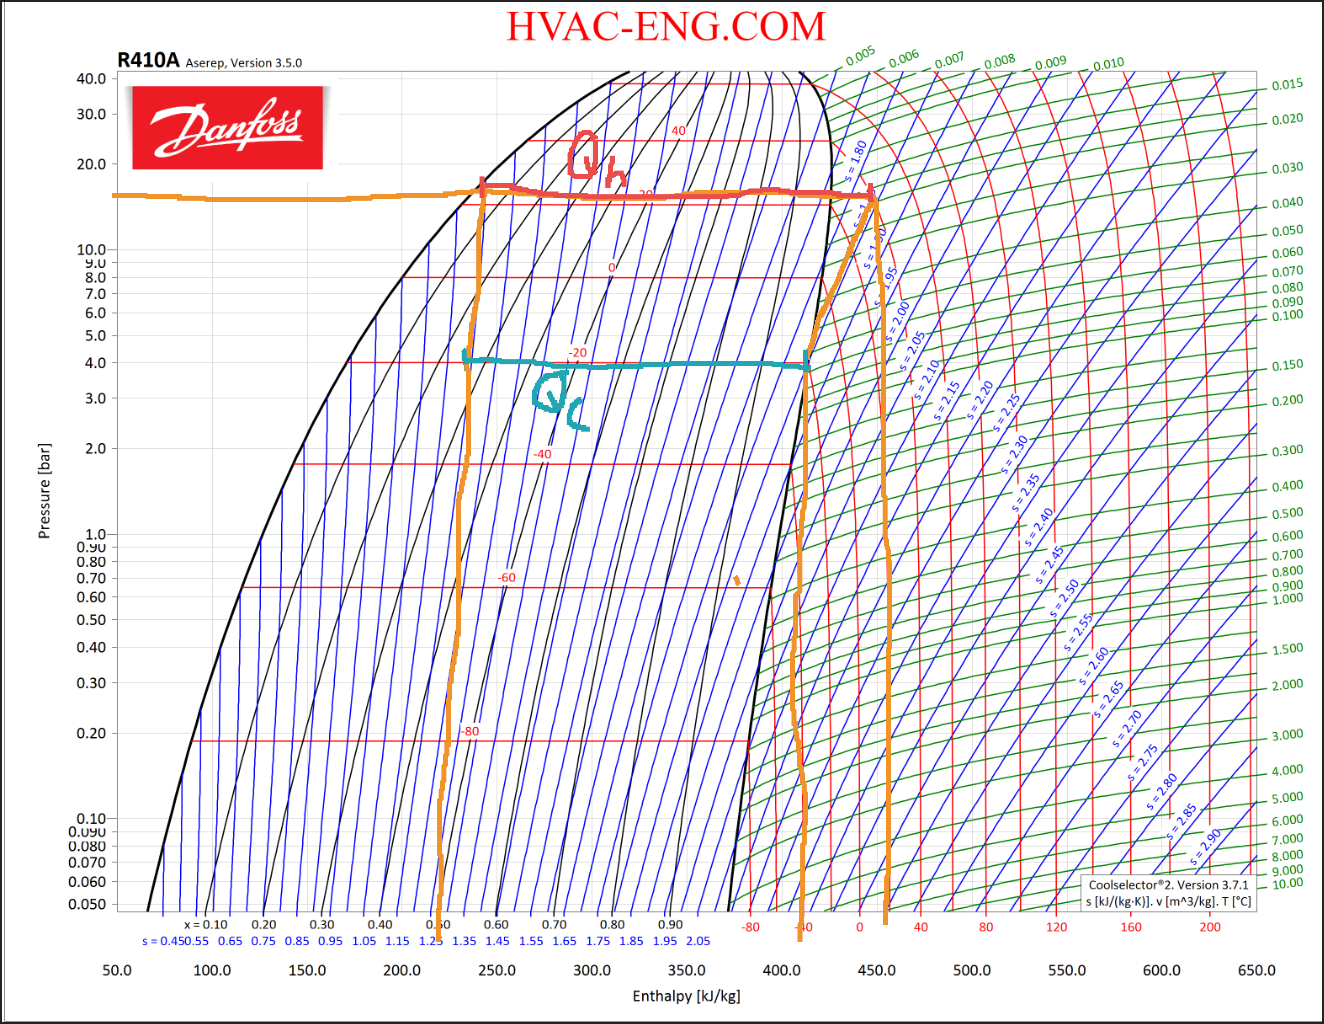

In [62]:
T_c = Q_(253, 'kelvin').to('celsius')
T_h = Q_(313, 'kelvin').to('celsius')

T_c, T_h

(<Quantity(-20.149999999999977, 'degree_Celsius')>,
 <Quantity(39.85000000000002, 'degree_Celsius')>)

1) Based on the figure, estimate the COP of the heat
pump. Assume that the compression and expansion are
isentropic and that evaporation and condensation are
isothermic.

2) How much heat is pumped per cycle (i.e. calculate Qc
and Qh).

3) Calculate how many grams of R410a which must
complete a cycle every second to deliver 10 kW of heat.

# Answer
If we limit the entropy (s) to be constant then we know that we need to follow a blue line. Based on the translated temperatures we start at -20 degree. Then we need to go to the s closest to where x = 1 (100% is gas) and T = -20 $\degree C$. We can then follow that s as you would then increase pressure until we hit 40 $\degree C$. Then we can use this to see the $Q_c$ and $Q_h$ values.

In [63]:
Q_h = Q_(460, 'kJ') - Q_(225, 'kJ')
Q_c = Q_(410, 'kJ') - Q_(225, 'kJ')
W = Q_h - Q_c
K_p = Q_h / W

print(f"The coefficient of performance is: {K_p:.2f}")
print(f"The heat input to the hot reservoir is: {Q_h:.2f}")
print(f"The heat extracted from the cold reservoir is: {Q_c:.2f}")

heat_pr_cycle_at_1_kg = (Q_h / Q_(1, 'second')).to('kW')
kg_for_10_kW = Q_(10, 'kW') / heat_pr_cycle_at_1_kg
print(f"The heat transfer rate of the heat pump is: {heat_pr_cycle_at_1_kg:.2f}")
print(f"The mass of R410a required for a 10 kW heat pump is: {kg_for_10_kW:.2f} kg")

The coefficient of performance is: 4.70 dimensionless
The heat input to the hot reservoir is: 235.00 kilojoule
The heat extracted from the cold reservoir is: 185.00 kilojoule
The heat transfer rate of the heat pump is: 235.00 kilowatt
The mass of R410a required for a 10 kW heat pump is: 0.04 dimensionless kg


# Problem 3: SCOP
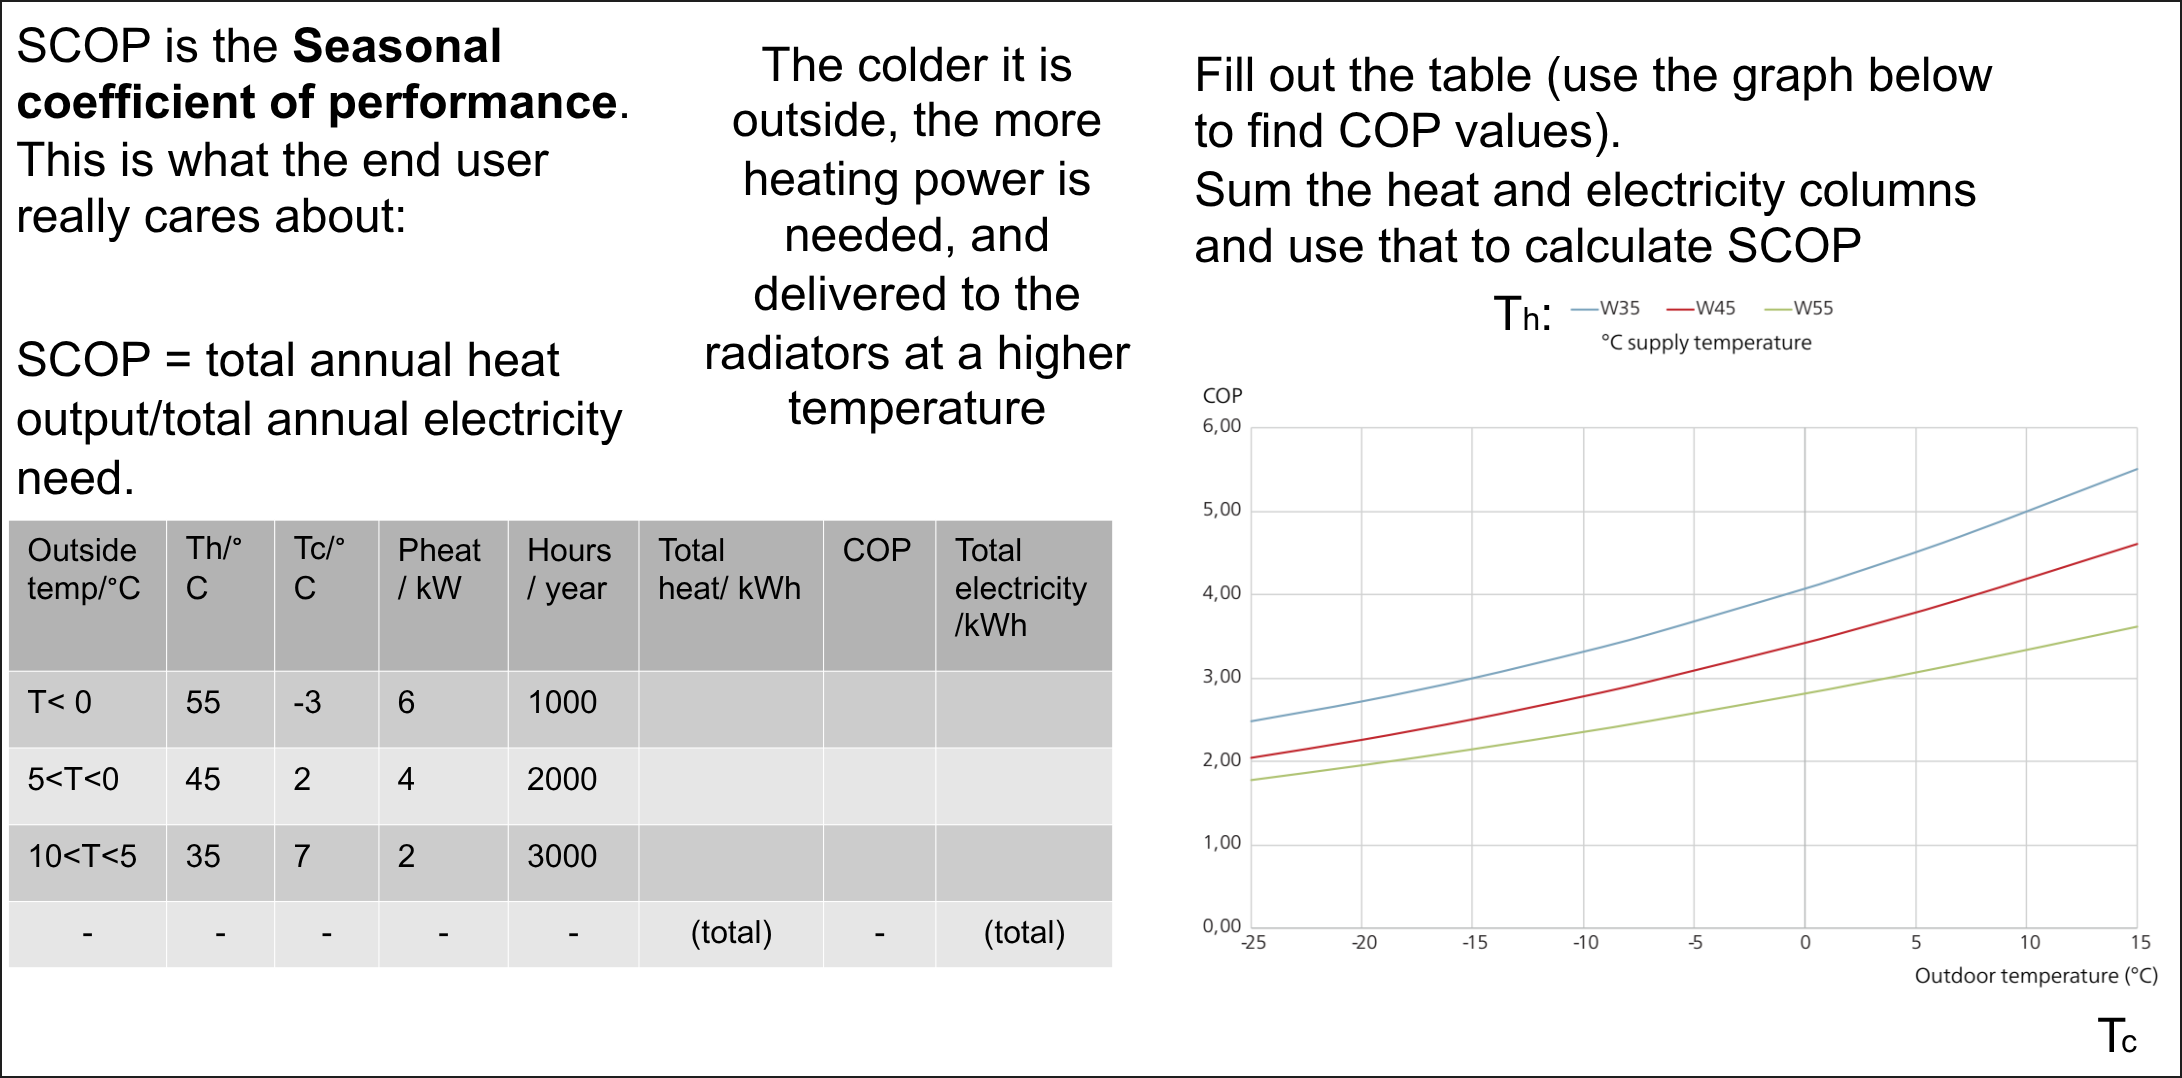

In [82]:
# --- Your original setup code ---
Outside_T = ["T < 0", "0 < T < 5", "5 < T < 10"] # Corrected the middle range for clarity
T_h = [Q_(55, 'degC'), Q_(45, 'degC'), Q_(35, 'degC')]
T_c = [Q_(-3, 'degC'), Q_(2, 'degC'), Q_(7, 'degC')]
Pheat = [Q_(6, 'kW'), Q_(4, 'kW'), Q_(2, 'kW')]
Hours = [Q_(1000, 'hour'), Q_(2000, 'hour'), Q_(3000, 'hour')]
Total_heat = [Pheat[i] * Hours[i] for i in range(3)]
COP = [2.5, 3.5, 4.6]
Total_electricity = [((Pheat[i] / COP[i]) * Hours[i]).to('kWh') for i in range(3)]

# --- Corrected DataFrame creation ---
df = pd.DataFrame({
    'Outside temp (degC)': Outside_T + ['Total'],
    'T_h (degC)': T_h + [None],
    'T_c (degC)': T_c + [None],
    'P_heat (kW)': Pheat + [None],
    'Hours (year)': Hours + [None], 
    'Total heat (kWh)': Total_heat + [sum(Total_heat)],    
    'COP': COP + [None],
    'Total electricity (kWh)': Total_electricity + [sum(Total_electricity)],
    })

SCOP = (sum(Total_heat) / sum(Total_electricity)).to_base_units()
print(f"The Seasonal Coefficient of Performance (SCOP) is: {SCOP:.2f}")

df.head(4)

The Seasonal Coefficient of Performance (SCOP) is: 3.34 dimensionless


,Outside temp (degC),T_h (degC),T_c (degC),P_heat (kW),Hours (year),Total heat (kWh),COP,Total electricity (kWh)
0,T < 0,55 degree_Celsius,-3 degree_Celsius,6 kilowatt,1000 hour,6000 hour * kilowatt,2.5,2400.0 kilowatt_hour
1,0 < T < 5,45 degree_Celsius,2 degree_Celsius,4 kilowatt,2000 hour,8000 hour * kilowatt,3.5,2285.714285714286 kilowatt_hour
2,5 < T < 10,35 degree_Celsius,7 degree_Celsius,2 kilowatt,3000 hour,6000 hour * kilowatt,4.6,1304.3478260869567 kilowatt_hour
3,Total,None,None,None,None,20000 hour * kilowatt,NaN,5990.062111801243 kilowatt_hour


# Problem 4: Heat Pump vs Gas Stove
Which is better – a gas stove or a heat pump (powered by natural gas via electricity)?
Assume that a heat pump system delivers a real-world SCOP of 3.5
Assume also, that the losses in the electricity grid are 10% (i.e. 90% of the electricity
delivered from the power plant arrives at the consumer) and that the gas stove is 100%
efficient.

1) Calculate the power plant efficiency, η, for which a grid powered heat pump use as
much gas as a 100% efficient gas powered stove.

2) What is the typical efficiency of a natural gas powered plant (look it up)?

3) Explain why no thermal power plan comes close to 100% efficiency.


We use the formula:
$$
K_R = \frac{Q_c}{W} = \frac{Q_c}{Q_h - Q_c}
$$

In [85]:
SCOP = 3.5
efficiency_electric_grid = 0.9 # 90%

# Lets say we want to deliver 3.5 kWh of heat to the house
desired_heat_output = Q_(3.5, 'kWh')
# Then the consumed electricity would be:
consumed_electricity = (desired_heat_output / SCOP) / efficiency_electric_grid 
print(f"The consumed electricity from the grid is: {consumed_electricity:.2f}")
# The amount of natural gas the power plant must burn depends on its efficiency, ηplant​. 
# Now, we set the gas consumption of both systems equal to each other:
# Gas for stove = Gas for power plant / η_plant​
gas_for_stove = Q_(3.5, 'kWh')
n_plant = consumed_electricity / gas_for_stove
print(f"The break even efficiency of the power plant is: {n_plant:.2%}")


The consumed electricity from the grid is: 1.11 kilowatt_hour
The break even efficiency of the power plant is: 31.75% dimensionless


If the power plant is more efficient than this, the heat pump uses less total gas. If it's less efficient, the gas stove is better.

### 2. Typical Gas Power Plant Efficiency

The efficiency of a natural gas power plant depends on its technology:

* **Simple-Cycle Gas Plant:** These are the most basic types and typically have an efficiency of **35-42%**.
* **Combined-Cycle Gas Turbine (CCGT) Plant:** These are more advanced and common. They use waste heat from the gas turbine to power a secondary steam turbine. CCGT plants have a much higher efficiency, typically in the range of **50-60%**, with the most modern plants exceeding 64%.

Since typical modern plants operate well above the 31.7% break-even point, a heat pump powered by a gas plant is almost always more efficient and uses less total natural gas than a high-efficiency gas stove.


### 3. Why Thermal Power Plants Aren't 100% Efficient

No thermal power plant can ever be 100% efficient due to the **Second Law of Thermodynamics**.

This fundamental law of physics states that heat cannot be converted into useful work with 100% efficiency.

A heat engine (which is what a thermal power plant is) works by taking heat from a **hot source** (burning fuel), using some of that energy to do work (spin a turbine), and then rejecting the remaining energy as **waste heat** into a **cold sink** (the surrounding environment, like a river or the atmosphere).

A heat engine requires a "flow" of heat from hot to cold to function. The heat that is rejected to the cold sink is an unavoidable loss and prevents the efficiency from ever reaching 100%.

The theoretical maximum efficiency for any heat engine is described by the **Carnot Efficiency**, which depends on the absolute temperatures of the hot source ($T_H$) and the cold sink ($T_C$):

$$η_{max} = 1 - \frac{T_C}{T_H}$$

Because it's impossible for the cold sink ($T_C$) to be at absolute zero (0 Kelvin), the fraction $T_C/T_H$ will always be greater than zero, meaning the efficiency will always be less than 1.